**Fase 1 => Persiapan dan Prapemrosesan Data**

In [4]:
# Sel 1 -- Import Library

print("Mengimpor Semua Library yang Dibutuhkan...")

import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from sklearn.metrics import confusion_matrix, classification_report

print("Library Berhasil Diimpor.")
print("Versi TensorFlow:", tf.__version__)

Mengimpor Semua Library yang Dibutuhkan...
Library Berhasil Diimpor.
Versi TensorFlow: 2.19.0


In [5]:
# Sel 2 -- Setup Random Seed Agar Hasilnya Stabil

RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
print("Random Seed Diset Ke :", RANDOM_SEED)

Random Seed Diset Ke : 42


In [6]:
# Sel 3 -- Memuat Dataset MNIST

print("Memuat Dataset MNIST (digit tulisan tangan 0-9)...")

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Jumlah Data Latih : {x_train.shape[0]}")
print(f"Jumlah Data Uji : {x_test.shape[0]}")
print(f"Bentuk Data 1 Gambar : {x_train[0].shape}")

Memuat Dataset MNIST (digit tulisan tangan 0-9)...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Jumlah Data Latih : 60000
Jumlah Data Uji : 10000
Bentuk Data 1 Gambar : (28, 28)


In [7]:
# Sel 4 -- Prapemrosesan Data u/ Model A (CNN - Manual)

print("Melakukan Normalisasi dan Encoding Data u/ Model A...")

# Normalisasi 0 - 1
x_train_A = x_train.astype("float32") / 255.0
x_test_A = x_test.astype("float32") / 255.0

# Menambahkan Channel Dimension (28, 28) --> ( 28, 28, 1)
x_train_A = np.expand_dims(x_train_A, -1)
x_test_A = np.expand_dims(x_test_A, -1)

# One Hot Encoding Label
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print("Contoh Bentuk Data Baru :", x_train_A.shape)


Melakukan Normalisasi dan Encoding Data u/ Model A...
Contoh Bentuk Data Baru : (60000, 28, 28, 1)


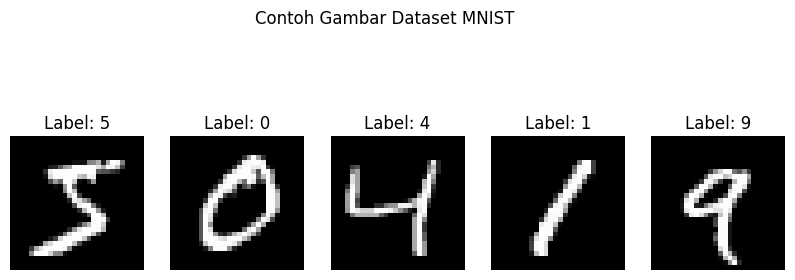

In [8]:
# Sel 5 -- Visualisasi Contoh Data MNIST

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Contoh Gambar Dataset MNIST")
plt.show()

**Fase 2 => Model A (CNN-Manual)**

In [9]:
# Sel 6 -- Membangun Model A (CNN - Manual)

input_shape_A = (28,28,1)
model_A = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape_A),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_A.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_A.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Sel 7 -- Melatih Model A (CNN - Manual)

epochs_A = 5
batch_size = 128

print("Melatih Model A (CNN MNIST)...")
history_A = model_A.fit(
    x_train_A, y_train_cat,
    validation_data=(x_test_A, y_test_cat),
    epochs=epochs_A,
    batch_size=batch_size
)
print("Pelatihan Model A Selesai.")

Melatih Model A (CNN MNIST)...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8156 - loss: 0.5906 - val_accuracy: 0.9809 - val_loss: 0.0591
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9727 - loss: 0.0948 - val_accuracy: 0.9873 - val_loss: 0.0435
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9801 - loss: 0.0687 - val_accuracy: 0.9869 - val_loss: 0.0394
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9834 - loss: 0.0573 - val_accuracy: 0.9879 - val_loss: 0.0366
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9858 - loss: 0.0469 - val_accuracy: 0.9900 - val_loss: 0.0297
Pelatihan Model A Selesai.


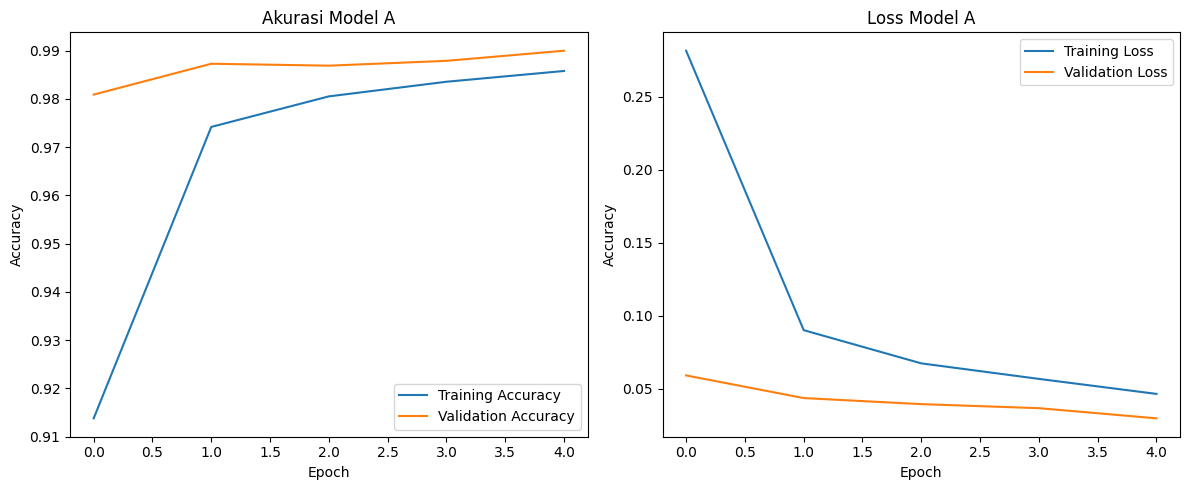

In [68]:
# Sel 8 -- Visualisasi Hasil Pelatihan Model A

# Plot Akurasi
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_A.history['accuracy'], label='Training Accuracy')
plt.plot(history_A.history['val_accuracy'], label='Validation Accuracy')
plt.title("Akurasi Model A")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history_A.history['loss'], label='Training Loss')
plt.plot(history_A.history['val_loss'], label='Validation Loss')
plt.title("Loss Model A")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Fase 3 => Evaluasi Model A pada Gambar Pribadi Tulisan Tangan**

In [69]:
# Sel 9 -- Upload Gambar Tulisan Tangan

from google.colab import files

print("Mengupload 30 Gambar Tulisan Tangan...")
uploaded_files = files.upload()

HANDWRITTEN_FOLDER = '/content/handwritten/'
os.makedirs(HANDWRITTEN_FOLDER, exist_ok=True)

# Simpan ke Folder
for name, data in uploaded_files.items():
    with open(os.path.join(HANDWRITTEN_FOLDER, name), 'wb') as f:
        f.write(data)

print(f"{len(uploaded_files)} Gambar Disimpan di {HANDWRITTEN_FOLDER}")

Mengupload 30 Gambar Tulisan Tangan...


Saving 6_10.jpeg to 6_10 (1).jpeg
Saving 6_9.jpeg to 6_9 (1).jpeg
Saving 6_8.jpeg to 6_8 (1).jpeg
Saving 6_7.jpeg to 6_7 (1).jpeg
Saving 6_6.jpeg to 6_6 (1).jpeg
Saving 6_5.jpeg to 6_5 (1).jpeg
Saving 6_4.jpeg to 6_4 (1).jpeg
Saving 6_3.jpeg to 6_3 (1).jpeg
Saving 6_2.jpeg to 6_2 (1).jpeg
Saving 6_1.jpeg to 6_1 (1).jpeg
Saving 3_10.jpeg to 3_10 (1).jpeg
Saving 3_9.jpeg to 3_9 (1).jpeg
Saving 3_8.jpeg to 3_8 (1).jpeg
Saving 3_7.jpeg to 3_7 (1).jpeg
Saving 3_6.jpeg to 3_6 (1).jpeg
Saving 3_5.jpeg to 3_5 (1).jpeg
Saving 3_4.jpeg to 3_4 (1).jpeg
Saving 3_3.jpeg to 3_3 (1).jpeg
Saving 3_2.jpeg to 3_2 (1).jpeg
Saving 3_1.jpeg to 3_1 (1).jpeg
Saving 0_10.jpeg to 0_10 (1).jpeg
Saving 0_9.jpeg to 0_9 (1).jpeg
Saving 0_8.jpeg to 0_8 (1).jpeg
Saving 0_7.jpeg to 0_7 (1).jpeg
Saving 0_6.jpeg to 0_6 (1).jpeg
Saving 0_5.jpeg to 0_5 (1).jpeg
Saving 0_4.jpeg to 0_4 (1).jpeg
Saving 0_3.jpeg to 0_3 (1).jpeg
Saving 0_2.jpeg to 0_2 (1).jpeg
Saving 0_1.jpeg to 0_1 (1).jpeg
30 Gambar Disimpan di /content/han

In [70]:
# Sel 10 -- Prapemrosessan Gambar Upload U/ Model A

def preprocess_image(img_bytes):
    try:
        nparr = np.frombuffer(img_bytes, np.uint8)
        img_bgr = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        _, img_thresh = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
        img_inv = cv2.bitwise_not(img_thresh)
        img_resized = cv2.resize(img_inv, (28, 28))
        img_norm = img_resized.astype("float32") / 255.0
        img_input = img_norm.reshape(1, 28, 28, 1)
        return img_input, img_resized
    except:
        return None, None

print("Fungsi Prapemrosesan Siap Digunakan.")

Fungsi Prapemrosesan Siap Digunakan.


Total Gambar Diproses : 30


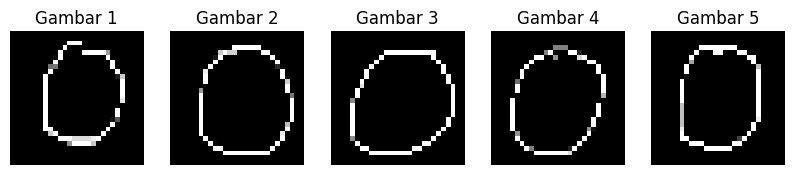

In [71]:
# Sel 11 -- Memproses Semua 30 Gambar

list_inputs = []
list_visual = []

for name in sorted(uploaded_files.keys()):
    img_input, vis = preprocess_image(uploaded_files[name])
    if img_input is not None:
        list_inputs.append(img_input)
        list_visual.append(vis)

data_pribadi_A = np.vstack(list_inputs)
print(f"Total Gambar Diproses : {len(data_pribadi_A)}")

# Visualisasi 5 Contoh Gambar
plt.figure(figsize=(10,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(list_visual[i], cmap='gray')
    plt.title(f"Gambar {i+1}")
    plt.axis('off')
plt.show()

Menampilkan 15 Gambar Acak dari Perwakilan Masing-masing NIM (036)...


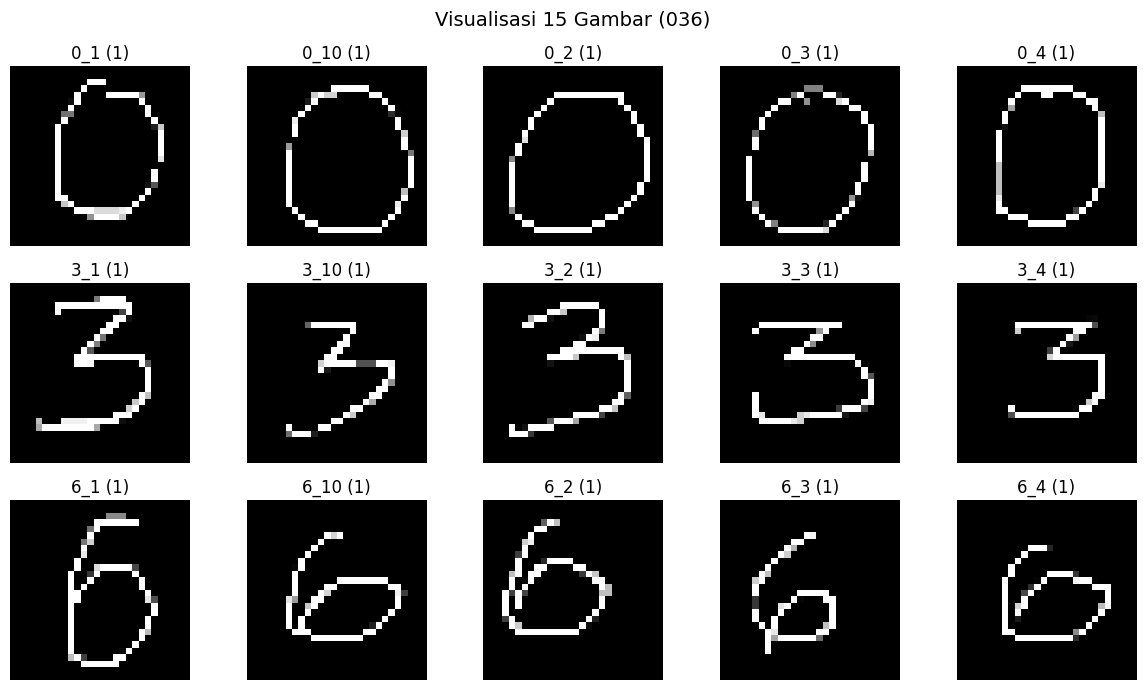

In [73]:
# NB Visualisasikan 15 Gambar dari Perwakilan 3 Angka Terakhir NIM
# 0 = 5 --> Set A
# 3 = 5 --> Set B
# 6 = 5 --> Set C

print("Menampilkan 15 Gambar Acak dari Perwakilan Masing-masing NIM (036)...")

if len(list_visual) >= 25:
    indeks_spesifik = [0,1,2,3,4, 10,11,12,13,14, 20,21,22,23,24]

    plt.figure(figsize=(12,7))
    for i, idx in enumerate(indeks_spesifik):
        plt.subplot(3,5,i+1)
        plt.imshow(list_visual[idx], cmap='gray')
        plt.title(f"{sorted(uploaded_files.keys())[idx].replace('.jpeg','')}")
        plt.axis('off')

    plt.suptitle("Visualisasi 15 Gambar (036)", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("Jumlah Gambar Kurang dari 25, Memastikan Semua 30 File Telah Diupload dan Diproses.")

In [74]:
# Sel 12 -- Memprediksi Model A pada Gambar

ANGKA_NIM_1 = 0
ANGKA_NIM_2 = 3
ANGKA_NIM_3 = 6
labels_asli = ([ANGKA_NIM_1]*10) + ([ANGKA_NIM_2]*10) + ([ANGKA_NIM_3]*10)

prediksi_A = model_A.predict(data_pribadi_A)
prediksi_kelas_A = np.argmax(prediksi_A, axis=1)

benar_A = sum([1 for i in range(30) if labels_asli[i]==prediksi_kelas_A[i]])
akurasi_A = benar_A/30*100

print(f"Akurasi Model A pada Gambar Pribadi : {akurasi_A:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Akurasi Model A pada Gambar Pribadi : 70.00%


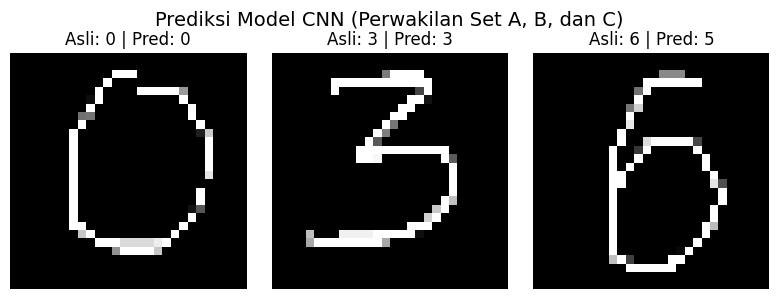

In [75]:
# Visualisasi Hasil Prediksi

plt.figure(figsize=(8,3))
indeks_perwakilan = [0, 10, 20]

for i, idx in enumerate(indeks_perwakilan):
    plt.subplot(1,3,i+1)
    plt.imshow(list_visual[idx], cmap='gray')
    plt.title(f"Asli: {labels_asli[idx]} | Pred: {prediksi_kelas_A[idx]}")
    plt.axis('off')

plt.suptitle("Prediksi Model CNN (Perwakilan Set A, B, dan C)", fontsize=14)
plt.tight_layout()
plt.show()

**Fase 4 => Model B (Transfer Learning)**

In [76]:
# Sel 13 -- Persiapan Data U/ Model B (Transfer Learning)

x_train_B = tf.image.grayscale_to_rgb(tf.image.resize(x_train_A, [32,32]))
x_test_B = tf.image.grayscale_to_rgb(tf.image.resize(x_test_A, [32,32]))
print("Data Siap u/ Model B (VGG16).")

Data Siap u/ Model B (VGG16).


In [77]:
from tensorflow.keras.optimizers import Adam

In [78]:
# Sel 14 -- Membangun Model B (Transfer Learning VGG16)

base_model_B = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model_B.trainable = False

model_B = models.Sequential([
    base_model_B,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
optimizer_B = Adam(learning_rate=0.0001)

model_B.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_B.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [79]:
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
epochs_B = 20 # Naikkan maksimum epochs, tapi EarlyStopping akan menghentikannya
print("Melatih Model B (Transfer Learning VGG16)...")

# Definisikan Early Stopping
es = EarlyStopping(
    monitor='val_loss', # Pantau kerugian (loss) pada data validasi
    patience=3,         # Hentikan jika val_loss tidak membaik dalam 3 epoch
    restore_best_weights=True # Gunakan bobot terbaik saat dihentikan
)

history_B = model_B.fit(
    x_train_B, y_train_cat,
    validation_data=(x_test_B, y_test_cat),
    epochs=epochs_B,
    batch_size=128,
    callbacks=[es] # <-- Tambahkan Callback
)
print("Pelatihan Model B Selesai.")

Melatih Model B (Transfer Learning VGG16)...
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.6401 - loss: 1.1322 - val_accuracy: 0.9239 - val_loss: 0.2732
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8994 - loss: 0.3405 - val_accuracy: 0.9472 - val_loss: 0.1781
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9254 - loss: 0.2505 - val_accuracy: 0.9560 - val_loss: 0.1427
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9369 - loss: 0.2106 - val_accuracy: 0.9601 - val_loss: 0.1260
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9437 - loss: 0.1864 - val_accuracy: 0.9622 - val_loss: 0.1180
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9487 - loss: 0.1709 - val_accuracy: 0.9643 - val_loss: 0.1096
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9516 - loss: 0.1562 - val_accuracy: 0.9664 - val_loss: 0.1003
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 2

In [81]:
# Sel 15 -- Melatih Model B

epochs_B = 5
print("Melatih Model B (Transfer Learning VGG16)...")
history_B = model_B.fit(
    x_train_B, y_train_cat,
    validation_data=(x_test_B, y_test_cat),
    epochs=epochs_B,
    batch_size=128
)
print("Pelatihan Model B Selesai.")

Melatih Model B (Transfer Learning VGG16)...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9684 - loss: 0.1051 - val_accuracy: 0.9762 - val_loss: 0.0772
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9682 - loss: 0.0986 - val_accuracy: 0.9740 - val_loss: 0.0787
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9692 - loss: 0.0992 - val_accuracy: 0.9743 - val_loss: 0.0765
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9692 - loss: 0.0994 - val_accuracy: 0.9750 - val_loss: 0.0785
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9710 - loss: 0.0960 - val_accuracy: 0.9748 - val_loss: 0.0787
Pelatihan Model B Selesai.


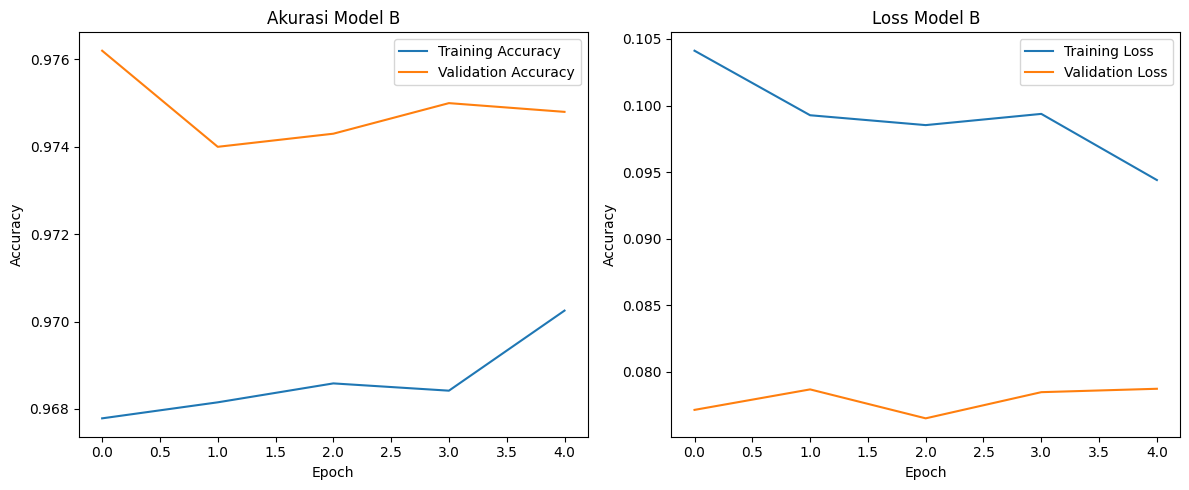

In [82]:
# Sel 16 -- Grafik Hasil Pelatihan Model B

# Plot Akurasi
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_B.history['accuracy'], label='Training Accuracy')
plt.plot(history_B.history['val_accuracy'], label='Validation Accuracy')
plt.title("Akurasi Model B")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history_B.history['loss'], label='Training Loss')
plt.plot(history_B.history['val_loss'], label='Validation Loss')
plt.title("Loss Model B")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Fase 5 => Evaluasi Model B**

In [83]:
# Sel 17 -- Memprediksi Model B pada Gambar

data_temp = data_pribadi_A[:, :, :, 0] * 255
data_temp = np.expand_dims(data_temp, axis=-1)

data_pribadi_B_temp = tf.image.resize(data_temp, [32, 32])
data_pribadi_B_temp = tf.image.grayscale_to_rgb(data_pribadi_B_temp).numpy()

data_pribadi_B = preprocess_input(data_pribadi_B_temp) # <-- Ini yang paling penting!

prediksi_B = model_B.predict(data_pribadi_B)
prediksi_kelas_B = np.argmax(prediksi_B, axis=1)

labels_asli = np.array([0]*10 + [3]*10 + [6]*10)

benar_B = sum([1 for i in range(30) if labels_asli[i]==prediksi_kelas_B[i]])
akurasi_B = benar_B/30*100

print(f"Akurasi Model B pada Gambar Pribadi : {akurasi_B:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
Akurasi Model B pada Gambar Pribadi : 30.00%


**Fase 6 => Analisis Perbandingan dari Ke-2 Model**

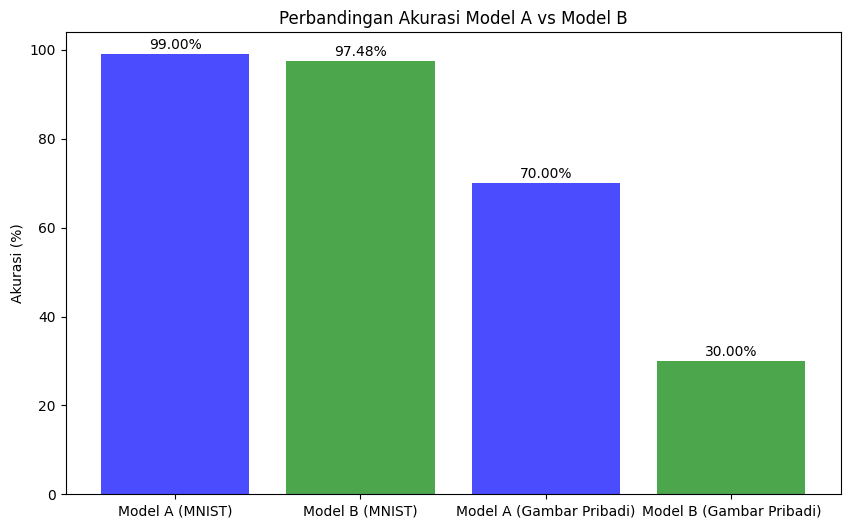

In [84]:
# Sel 18 -- Perbandingan Akurasi Model A vs Model B

acc_A_mnist = history_A.history['val_accuracy'][-1]*100
acc_B_mnist = history_B.history['val_accuracy'][-1]*100

labels = ['Model A (MNIST)', 'Model B (MNIST)',
          'Model A (Gambar Pribadi)', 'Model B (Gambar Pribadi)']
values = [acc_A_mnist, acc_B_mnist, akurasi_A, akurasi_B]
colors = ['blue','green','blue','green']

plt.figure(figsize=(10,6))
bars = plt.bar(labels, values, color=colors, alpha=0.7)
plt.ylabel('Akurasi (%)')
plt.title('Perbandingan Akurasi Model A vs Model B')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2.0, yval+0.5, f'{yval:.2f}%', ha='center', va='bottom')
plt.show()

Laporan Klasifikasi Model A dan Model B:

--- Model A ---
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           3       0.75      0.90      0.82        10
           5       0.00      0.00      0.00         0
           6       1.00      0.40      0.57        10

    accuracy                           0.70        30
   macro avg       0.62      0.53      0.54        30
weighted avg       0.83      0.70      0.72        30


--- Model B ---
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.30        30
   macro avg       0.17      0.15      0.16        30
we

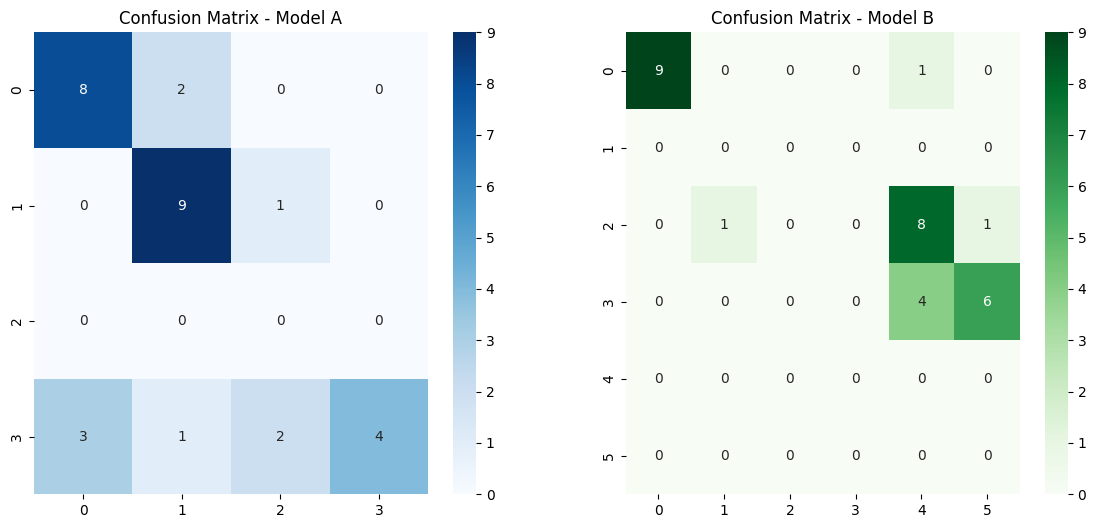

In [85]:
# Sel 19 -- Confussion Matrix dan Laporan Klasifikasi

print("Laporan Klasifikasi Model A dan Model B:")

print("\n--- Model A ---")
print(classification_report(labels_asli, prediksi_kelas_A, zero_division=0))

print("\n--- Model B ---")
print(classification_report(labels_asli, prediksi_kelas_B, zero_division=0))

cmA = confusion_matrix(labels_asli, prediksi_kelas_A)
cmB = confusion_matrix(labels_asli, prediksi_kelas_B)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(cmA, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - Model A")

plt.subplot(1,2,2)
sns.heatmap(cmB, annot=True, fmt='g', cmap='Greens')
plt.title("Confusion Matrix - Model B")
plt.show()